In [29]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [31]:
def generate_training_data(*argv):
  temp = []
  for arg in argv:
    temp.append(arg)
  return np.array(temp)
  
training_data = generate_training_data(200,300,1700,950,900,6)

In [33]:
def process_data(data):
  processed_data = []
  with open(data, 'r') as f:
    reader = csv.reader(f)
    next(reader)

    for row in reader:
      temp = [float(feature) for feature in row]
      processed_data.append(temp)
  
  return np.array(processed_data)

processed_data = process_data("house_data.csv")

In [34]:
def euc_distance(specimen, test_subject):
  temp_sum = 0
  #sum up the squared difference of each feature
  for s, t in zip(specimen, test_subject):
    temp_sum += (s-t)**2
  return np.sqrt(temp_sum)

In [35]:
def predict(k, data, training):
  first_col = data[:,0]
  distances = []
  for specimen in data:
    #skip first column with prices
    dist = euc_distance(specimen[1:], training)
    distances.append(dist)
  
  #Sort indicies by closest distance and get k of them
  nearest = np.argsort(distances)[:k]
  
  return np.mean([first_col[i] for i in nearest])

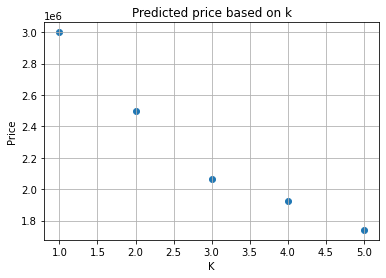

In [38]:
def run(data):
  max_k = len(data)
  k_var = np.arange(1,max_k+1,1)

  #Predict house price based on provided house data
  values = [predict(k, processed_data, training_data) for k in k_var]

  plt.title("Predicted price based on k")
  plt.ylabel("Price")
  plt.xlabel("K")
  plt.scatter(k_var, values)
  plt.grid()
  plt.show()

run(processed_data)